#### import Libraries

In [117]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### change Directory

In [118]:
os.getcwd()

'C:\\Users\\ABC\\Documents\\IBM AI 6th sem\\1. Supervised ML\\12. Logistic Regression\\Logistic regression based problems'

#### import dataset

In [119]:
data = pd.read_csv("train.csv")

In [120]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [121]:
data.shape

(891, 12)

In [122]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### drop PassengerID and Name from dataframe

In [123]:
data.drop(columns=(["PassengerId","Name"]),axis=1,inplace=True)

In [124]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S

#### find the stastical description of the data

In [125]:
data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

#### find the null values in the data

In [126]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### drop the cabin column from the dataframe

In [127]:
data.drop(columns = (["Cabin"]),axis=1,inplace=True)

In [128]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

#### draw countplot for the survived column and save the fig, also do observations 

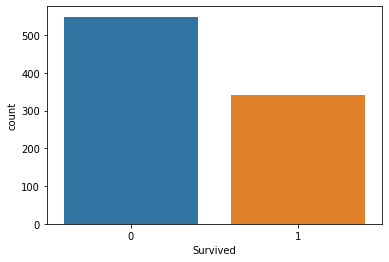

In [129]:
fig = sns.countplot(x='Survived',data=data)
plt.savefig("Survive_Count.png")

#### make observations for age columns using histogram

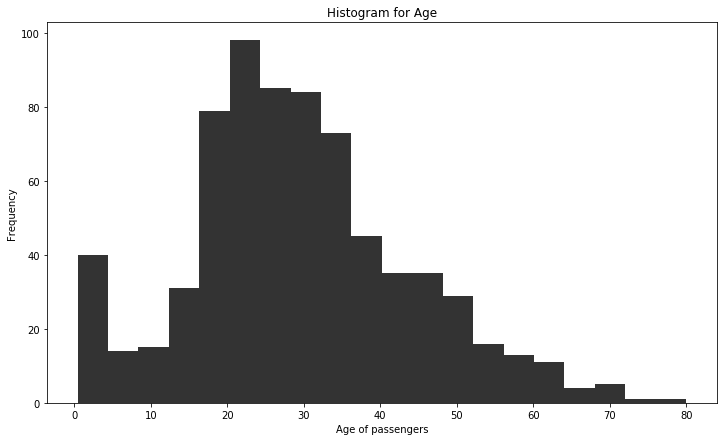

In [130]:
plt.figure(figsize=(12,7))
plt.hist(data['Age'],bins=20,alpha=0.8,color='black')
plt.xlabel("Age of passengers")
plt.ylabel("Frequency")
plt.title("Histogram for Age")
plt.show()

In [131]:
from matplotlib import style

In [132]:
print(style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


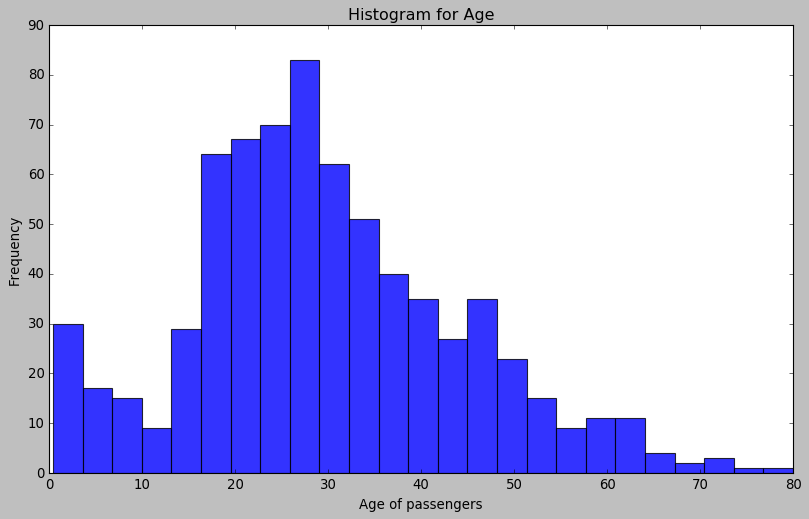

In [133]:
with plt.style.context('classic'): 
    plt.figure(figsize=(12,7))
    plt.hist(data['Age'],bins=25,alpha=0.8,color='blue')
    plt.xlabel("Age of passengers")
    plt.ylabel("Frequency")
    plt.title("Histogram for Age")
    plt.show()

#### make observations for age columns using histogram

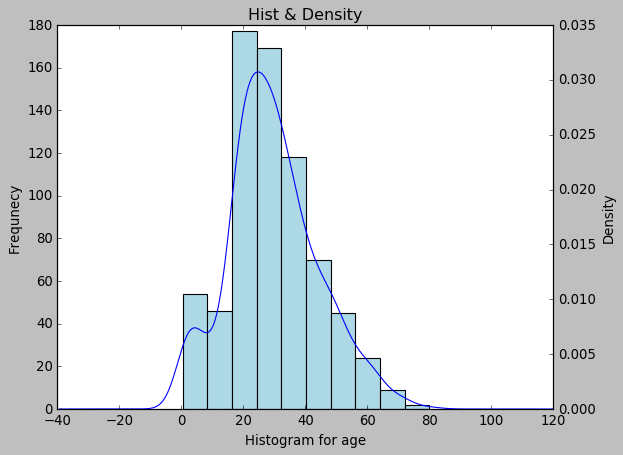

In [134]:
with plt.style.context('classic'):
    a1 = data['Age'].plot(kind='hist',color='lightblue')
    a2 = data['Age'].plot(kind='density',secondary_y=True)
    a1.set_ylabel("Frequnecy")
    a2.set_ylabel("Density")
    a1.set_xlabel("Histogram for age")
    a1.set_title("Hist & Density")
    plt.savefig("Hist & Density.png")


#### check the information for every columns using .info()

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


#### make heatmap for missing values

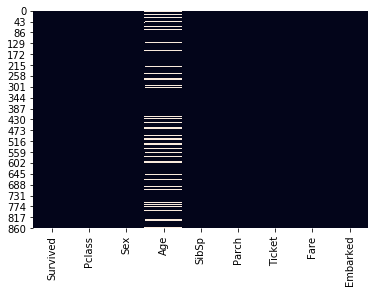

In [136]:
sns.heatmap(data.isnull(),cbar=False)

#### make boxplot in a single area of age for each Pclass 

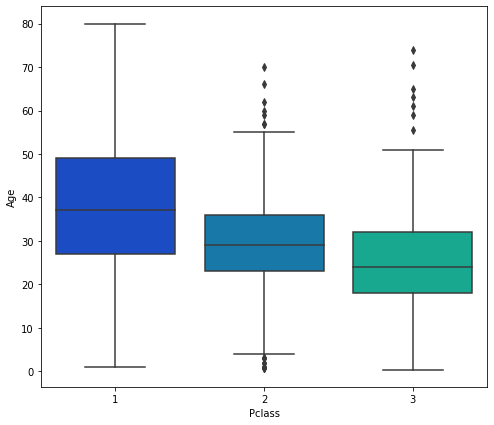

In [137]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [138]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [139]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

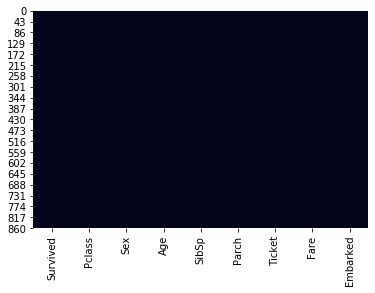

In [140]:
sns.heatmap(data.isnull(),cbar=False)

#### apply one hot encoding for sex, embarked and Pclass column

In [141]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [142]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [143]:
data = data[data['Embarked'].notna()]

In [144]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [145]:
data2 = data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1,1,2])], remainder='passthrough')
data2 = np.array(columnTransformer.fit_transform(data), dtype = np.str)

In [146]:
pd.DataFrame(data2)

0    1    2    3    4    5    6    7  8     9 10 11                12  \
0    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0  22.0  1  0         A/5 21171   
1    1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1  38.0  1  0          PC 17599   
2    0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1  26.0  0  0  STON/O2. 3101282   
3    0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1  35.0  1  0            113803   
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0  35.0  0  0            373450   
..   ...  ...  ...  ...  ...  ...  ...  ... ..   ... .. ..               ...   
884  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0  27.0  0  0            211536   
885  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1  19.0  0  0            112053   
886  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0  24.0  1  2        W./C. 6607   
887  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1  26.0  0  0            111369   
888  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0  32.0  0  0            370376   

          13  
0       7.25  
1    71.2833  
2      7.925  
3       53.1  
4       8.05  
..       ...  
884     13.0  
885     30.0  
886    23.45  
887     30.0  
888     7.75  

[889 rows x 14 columns]

In [147]:
sex = pd.get_dummies(data['Sex'],drop_first=False)
embark = pd.get_dummies(data['Embarked'],drop_first=False)
pclass = pd.get_dummies(data['Pclass'],drop_first=False)

sex

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]

In [148]:
embark

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[889 rows x 3 columns]

In [149]:
pclass

1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
..  .. .. ..
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[889 rows x 3 columns]

In [150]:
data[['female','male']]=sex
data[['C','Q','S']]=embark
data[['1','2','3']]=pclass

#### Drop Embarked, Sex, Pclass and ticket column 

In [151]:
data.drop(['Sex','Pclass','Embarked','Ticket'],axis=1,inplace=True)

In [152]:
data.head()

Survived   Age  SibSp  Parch     Fare  female  male  C  Q  S  1  2  3
0         0  22.0      1      0   7.2500       0     1  0  0  1  0  0  1
1         1  38.0      1      0  71.2833       1     0  1  0  0  1  0  0
2         1  26.0      0      0   7.9250       1     0  0  0  1  0  0  1
3         1  35.0      1      0  53.1000       1     0  0  0  1  1  0  0
4         0  35.0      0      0   8.0500       0     1  0  0  1  0  0  1

#### build a logistic regression model

In [153]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.2,random_state=200)

In [154]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 12)
(178, 12)
(711,)
(178,)


In [155]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
clf.predict_proba(x_test)

array([[0.8848612 , 0.1151388 ],
       [0.2505744 , 0.7494256 ],
       [0.55397382, 0.44602618],
       [0.89787739, 0.10212261],
       [0.85847003, 0.14152997],
       [0.56961173, 0.43038827],
       [0.3054473 , 0.6945527 ],
       [0.46341446, 0.53658554],
       [0.8848612 , 0.1151388 ],
       [0.8679347 , 0.1320653 ],
       [0.66311613, 0.33688387],
       [0.11893154, 0.88106846],
       [0.43249898, 0.56750102],
       [0.09806201, 0.90193799],
       [0.30260826, 0.69739174],
       [0.17032429, 0.82967571],
       [0.06287297, 0.93712703],
       [0.94498283, 0.05501717],
       [0.07447578, 0.92552422],
       [0.8848612 , 0.1151388 ],
       [0.91319409, 0.08680591],
       [0.95679549, 0.04320451],
       [0.55041653, 0.44958347],
       [0.05834826, 0.94165174],
       [0.92221608, 0.07778392],
       [0.88085966, 0.11914034],
       [0.61120097, 0.38879903],
       [0.48355604, 0.51644396],
       [0.19952614, 0.80047386],
       [0.40223126, 0.59776874],
       [0.

In [157]:
y_pred = clf.predict(x_test)

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.8426966292134831

In [159]:
confusion_matrix(y_test,y_pred)

array([[101,   8],
       [ 20,  49]], dtype=int64)

#### apply gridsearch CV for best parameters

In [160]:
np.random.seed(300)
model = GridSearchCV(clf,param_grid={"C":np.random.uniform(0,100,2),"penalty":['l1']})
model.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([45.11225687, 22.10223417]),
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### observe all the parameters for model

In [161]:
model.best_estimator_

LogisticRegression(C=45.112256870005474, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
model.best_params_

{'C': 45.112256870005474, 'penalty': 'l1'}

In [163]:
accuracy_score(y_test,model.predict(x_test))

0.848314606741573

In [164]:
clf2 = LogisticRegression(C=45.112256870005474, penalty = 'l1' )
clf2.fit(x_train,y_train)

LogisticRegression(C=45.112256870005474, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_pred2=clf2.predict(x_test)

In [166]:
accuracy_score(y_test,y_pred2)

0.848314606741573

### Using the model on testing data

In [167]:
data.head()

Survived   Age  SibSp  Parch     Fare  female  male  C  Q  S  1  2  3
0         0  22.0      1      0   7.2500       0     1  0  0  1  0  0  1
1         1  38.0      1      0  71.2833       1     0  1  0  0  1  0  0
2         1  26.0      0      0   7.9250       1     0  0  0  1  0  0  1
3         1  35.0      1      0  53.1000       1     0  0  0  1  1  0  0
4         0  35.0      0      0   8.0500       0     1  0  0  1  0  0  1

In [168]:
y_train = data['Survived']
x_train = data.drop('Survived',axis=1)

In [169]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [170]:
x_train

Age  SibSp  Parch     Fare  female  male  C  Q  S  1  2  3
0    22.0      1      0   7.2500       0     1  0  0  1  0  0  1
1    38.0      1      0  71.2833       1     0  1  0  0  1  0  0
2    26.0      0      0   7.9250       1     0  0  0  1  0  0  1
3    35.0      1      0  53.1000       1     0  0  0  1  1  0  0
4    35.0      0      0   8.0500       0     1  0  0  1  0  0  1
..    ...    ...    ...      ...     ...   ... .. .. .. .. .. ..
886  27.0      0      0  13.0000       0     1  0  0  1  0  1  0
887  19.0      0      0  30.0000       1     0  0  0  1  1  0  0
888  24.0      1      2  23.4500       1     0  0  0  1  0  0  1
889  26.0      0      0  30.0000       0     1  1  0  0  1  0  0
890  32.0      0      0   7.7500       0     1  0  1  0  0  0  1

[889 rows x 12 columns]

In [171]:
data_test = pd.read_csv("test.csv")

In [172]:
sex = pd.get_dummies(data_test['Sex'],drop_first=False)
embark = pd.get_dummies(data_test['Embarked'],drop_first=False)
pclass = pd.get_dummies(data_test['Pclass'],drop_first=False)

In [173]:
data_test[['female','male']]=sex
data_test[['C','Q','S']]=embark
data_test[['1','2','3']]=pclass

In [174]:
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  female  male  C  Q  S  \
0  34.5      0      0   330911   7.8292   NaN        Q       0     1  0  1  0   
1  47.0      1      0   363272   7.0000   NaN        S       1     0  0  0  1   
2  62.0      0      0   240276   9.6875   NaN        Q       0     1  0  1  0   
3  27.0      0      0   315154   8.6625   NaN        S       0     1  0  0  1   
4  22.0      1      1  3101298  12.2875   NaN        S       1     0  0  0  1   

   1  2  3  
0  0  0  1  
1  0  0  1  
2  0  1  0  
3  0  0  1  
4  0  0  1

In [175]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
female           0
male             0
C                0
Q                0
S                0
1                0
2                0
3                0
dtype: int64

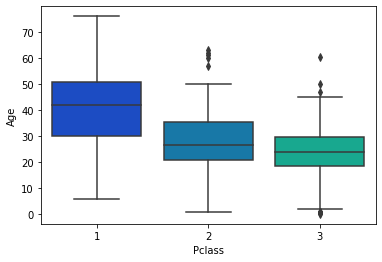

In [176]:
sns.boxplot(x='Pclass',y='Age',data=data_test,palette='winter')

In [177]:
int(data['Age'].mean())

29

In [178]:
data_test['Age'].fillna(int(data['Age'].mean()),inplace=True)

In [179]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
female           0
male             0
C                0
Q                0
S                0
1                0
2                0
3                0
dtype: int64

In [180]:
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  female  male  C  Q  S  \
0  34.5      0      0   330911   7.8292   NaN        Q       0     1  0  1  0   
1  47.0      1      0   363272   7.0000   NaN        S       1     0  0  0  1   
2  62.0      0      0   240276   9.6875   NaN        Q       0     1  0  1  0   
3  27.0      0      0   315154   8.6625   NaN        S       0     1  0  0  1   
4  22.0      1      1  3101298  12.2875   NaN        S       1     0  0  0  1   

   1  2  3  
0  0  0  1  
1  0  0  1  
2  0  1  0  
3  0  0  1  
4  0  0  1

In [181]:
data_test['Fare'].fillna(int(data['Fare'].mode()),inplace=True)

In [182]:
data_test.drop(['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [183]:
data_test.isnull().sum()

Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
C         0
Q         0
S         0
1         0
2         0
3         0
dtype: int64

In [184]:
np.random.seed(300)
clf = LogisticRegression()
clf.fit(x_train,y_train)
mod = GridSearchCV(clf,param_grid={"C":np.random.uniform(0,100,1),"penalty":['l1']})
mod.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([22.04452695]), 'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
mod.best_params_

{'C': 22.04452695028658, 'penalty': 'l1'}

In [186]:
y_pred_train = mod.predict(x_train)

In [187]:
accuracy_score(y_train,y_pred_train) # In sample error

0.8053993250843644

In [188]:
y_pred_test = mod.predict(data_test)

In [189]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,